In [171]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from geopandas.tools import overlay
from shapely.geometry import Point
from shapely.geometry import mapping
from shapely.geometry import Polygon
from shapely.geometry import LineString, MultiLineString
import shapely.speedups
import matplotlib.pyplot as plt
import timeit

# change default figsize 
plt.rcParams['figure.figsize'] = (15, 15)

In [128]:
lines = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/chapel-hill-bike-map-lines/exports/geojson')
bicycles = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/bicycle-crash-data-chapel-hill-region/exports/geojson')
town = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/overlay-zoning-districts/exports/geojson')

In [3]:
print(lines.crs, bicycles.crs)

{'init': 'epsg:4326'} {'init': 'epsg:4326'}


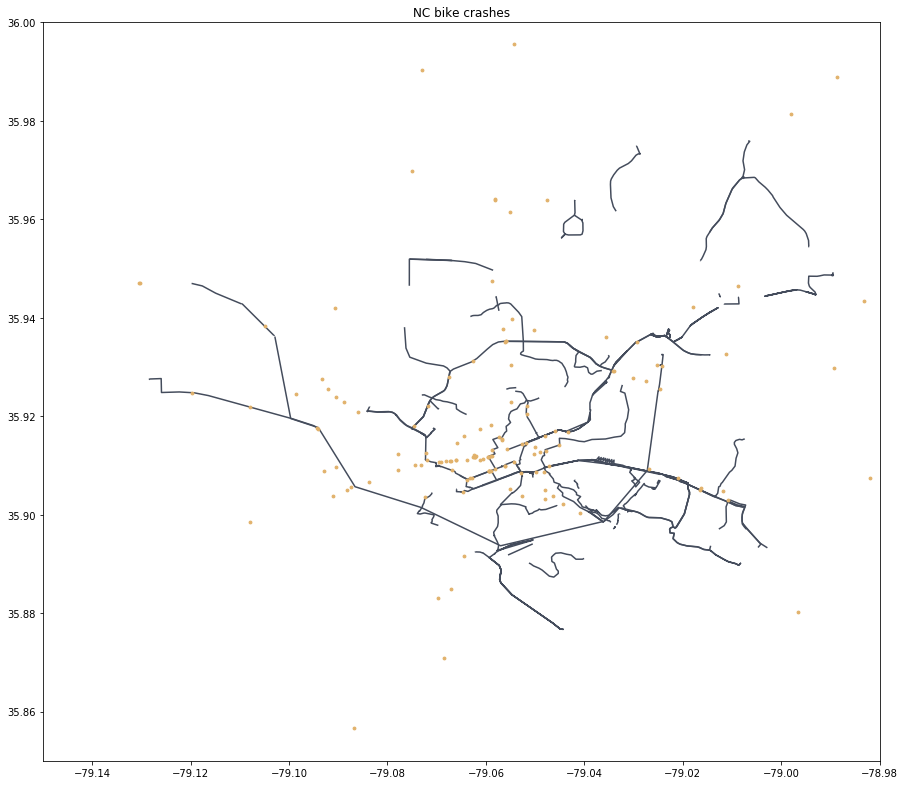

In [59]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines.plot(ax=ax, color='#444C5C', zorder=0);
bicycles.plot(ax=ax, color='#E1B16A', zorder=1, markersize=8);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

In [32]:
print(lines.crs, bicycles.crs)

{'init': 'epsg:4326'} {'init': 'epsg:4326'}


In [64]:
lines_4269 = lines.to_crs('+init=epsg:4269')

bikes_4269 = bicycles.to_crs('+init=epsg:4269')

In [36]:
print(lines_4269.crs, bikes_4269.crs)

+init=epsg:4269 +init=epsg:4269


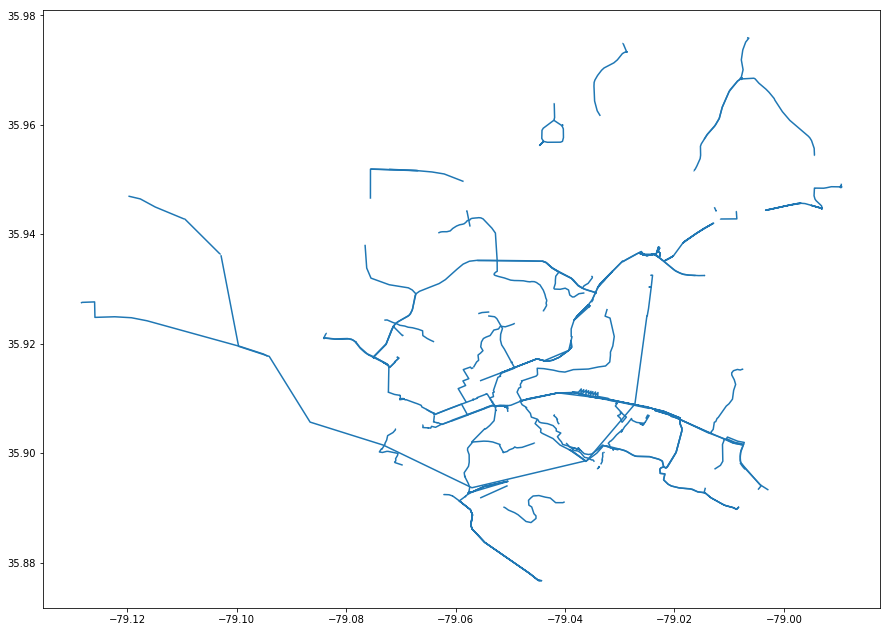

In [41]:
lines_4269.plot();

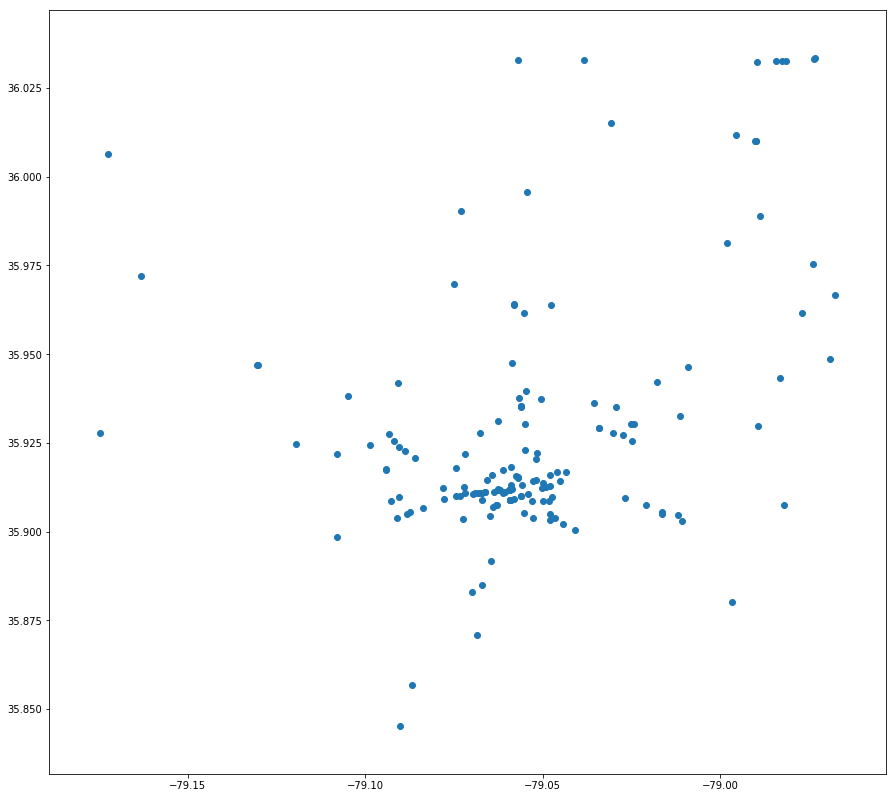

In [65]:
bikes_4269.plot();

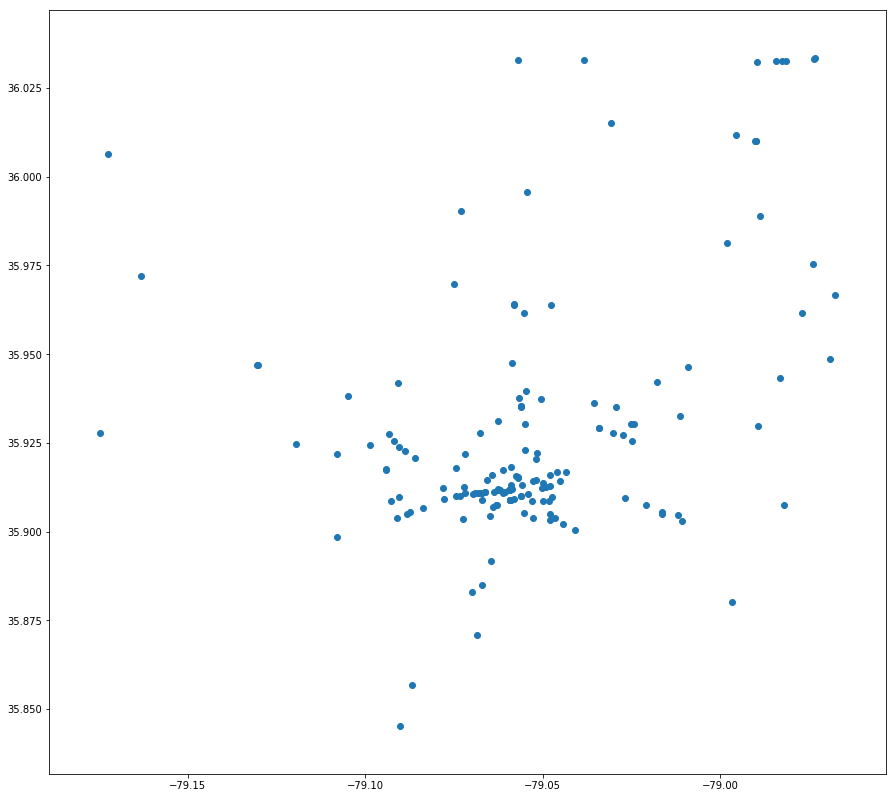

In [68]:
bicycles.plot();

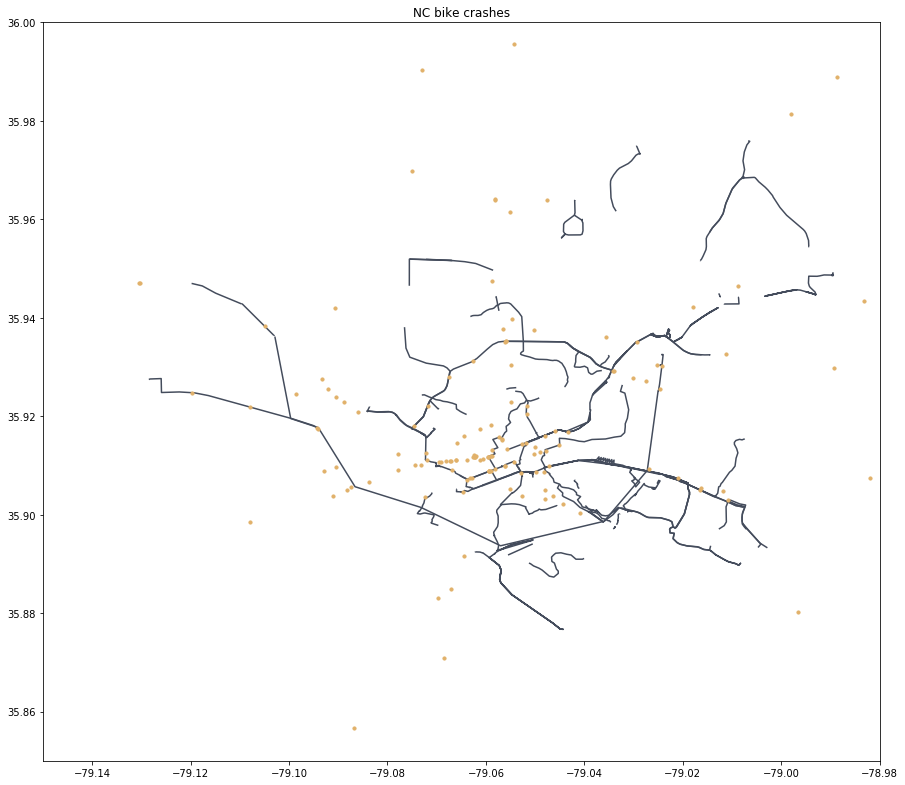

In [69]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines.plot(ax=ax, color='#444C5C', zorder=0);
bicycles.plot(ax=ax, color='#E1B16A', zorder=1, markersize=10);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

In [81]:
bicycles.geom_type.unique()

array(['Point'], dtype=object)

In [82]:
lines.geom_type.unique()

array(['LineString'], dtype=object)

In [83]:
print(type(bicycles))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [84]:
print(type(lines))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [91]:
bicycles

,ambulancer,rd_defects,crsh_sevri,objectid,crash_ty_1,crash_time,geo_point_2d,county,crash_mont,rural_urba,...,crash_year,drvr_age,weather,crsh_typex,rd_surface,num_lanes,hit_run,drvr_estsp,rd_config,geometry
0,Yes,None,K: Killed,450.0,311235.0,10:12:00,"{'lat': 35.9100670923, 'lon': -79.0745027481}",Orange,July,Urban,...,2011,70+,Clear,NaN,Smooth Asphalt,Unknown,No,11-15 mph,"Two-Way, Not Divided",POINT (-79.0745027481 35.9100670923)
1,Yes,None,B: Evident Injury,617.0,111141.0,08:40:00,"{'lat': 36.0100771166, 'lon': -78.9900027276}",Durham,September,Rural,...,2011,70+,Clear,NaN,Smooth Asphalt,2 lanes,No,6-10 mph,"Two-Way, Not Divided",POINT (-78.9900027276 36.0100771166)
2,Yes,None,B: Evident Injury,NaN,NaN,10:45:00,"{'lat': 35.9174, 'lon': -79.0612000005}",Orange,January,Urban,...,2013,53,Cloudy,111144.0,Smooth Asphalt,2 lanes,No,11-15 mph,"Two-Way, Not Divided",POINT (-79.06120000049999 35.9174)
3,No,None,B: Evident Injury,533.0,0.0,18:00:00,"{'lat': 36.0100571162, 'lon': -78.9900427273}",Durham,August,Rural,...,2010,70+,Clear,NaN,Coarse Asphalt,2 lanes,No,0-5 mph,"Two-Way, Not Divided",POINT (-78.99004272729999 36.0100571162)
4,Yes,None,B: Evident Injury,718.0,0.0,05:44:00,"{'lat': 35.9697141049, 'lon': -79.0750327509}",Orange,September,Urban,...,2010,55,Clear,NaN,Coarse Asphalt,5 lanes,No,16-20 mph,"Two-Way, Divided, Unprotected Median",POINT (-79.07503275089999 35.9697141049)
5,Yes,None,C: Possible Injury,152.0,211239.0,00:49:00,"{'lat': 36.0322271212, 'lon': -78.9896027284}",Orange,April,Rural,...,2011,Unknown,Clear,NaN,Smooth Asphalt,9 or more lanes,Yes,26-30 mph,"Two-Way, Not Divided",POINT (-78.9896027284 36.0322271212)
6,Yes,None,C: Possible Injury,53.0,211241.0,12:07:00,"{'lat': 35.9141340939, 'lon': -79.045082739}",Orange,February,Urban,...,2009,22,Clear,NaN,Smooth Asphalt,2 lanes,No,0-5 mph,"Two-Way, Divided, Unprotected Median",POINT (-79.04508273899999 35.9141340939)
7,Yes,None,C: Possible Injury,252.0,460910.0,07:25:00,"{'lat': 35.9047850933, 'lon': -79.0119027289}",Orange,June,Urban,...,2009,25,Clear,NaN,Smooth Asphalt,Unknown,No,0-5 mph,"Two-Way, Not Divided",POINT (-79.0119027289 35.9047850933)
8,Yes,None,B: Evident Injury,390.0,111141.0,12:04:00,"{'lat': 35.9117270925, 'lon': -79.0624127445}",Orange,July,Urban,...,2009,54,Clear,NaN,Smooth Asphalt,2 lanes,No,0-5 mph,"Two-Way, Not Divided",POINT (-79.06241274449999 35.9117270925)
9,No,None,C: Possible Injury,241.0,111212.0,17:28:00,"{'lat': 35.9086970922, 'lon': -79.0499327405}",Orange,April,Urban,...,2008,24,Clear,NaN,Smooth Asphalt,2 lanes,No,Unknown,"Two-Way, Divided, Unprotected Median",POINT (-79.0499327405 35.9086970922)


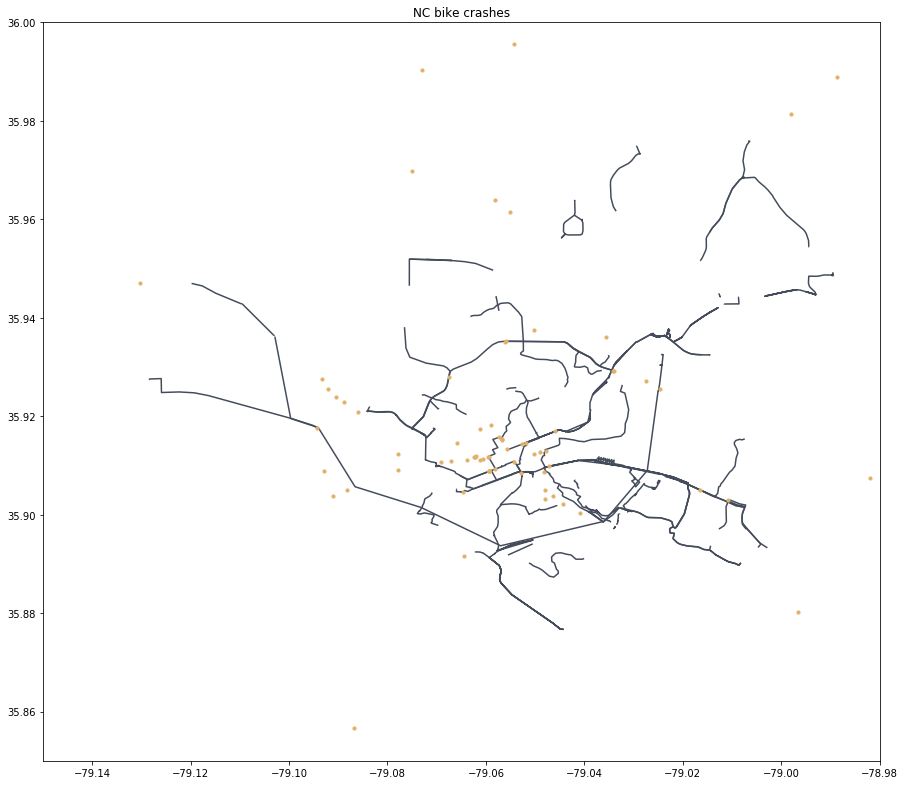

In [94]:
injuries = bicycles.loc[bicycles['crsh_sevri'] == 'B: Evident Injury']

fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines.plot(ax=ax, color='#444C5C', zorder=0);
injuries.plot(ax=ax, color='#E1B16A', zorder=1, markersize=10);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

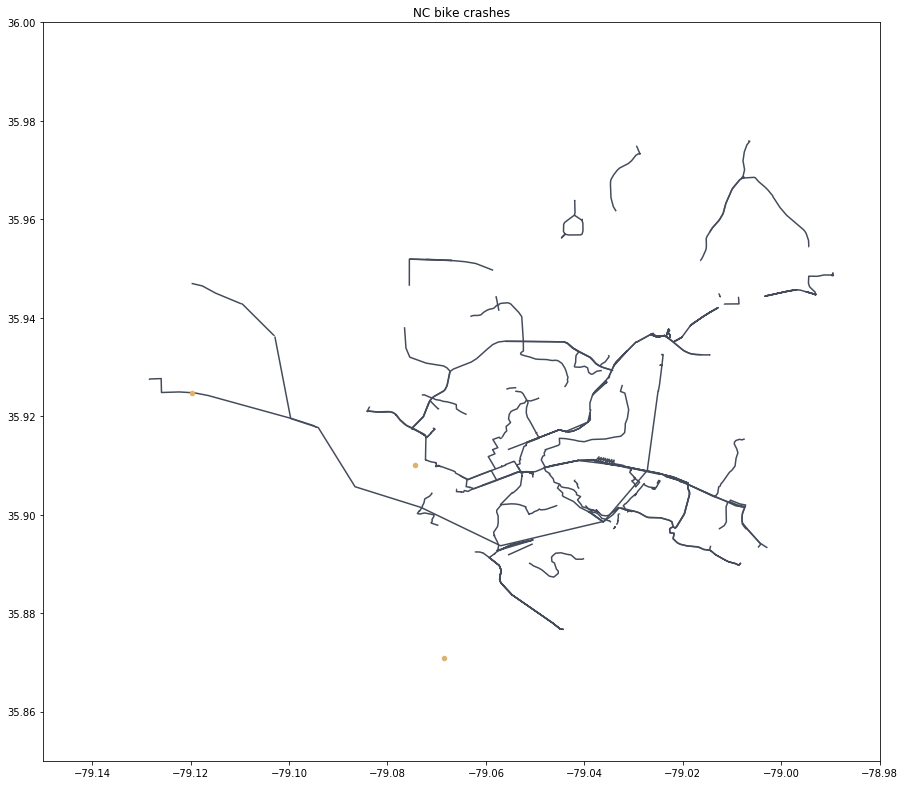

In [95]:
fatalities = bicycles.loc[bicycles['crsh_sevri'] == 'K: Killed']

fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines.plot(ax=ax, color='#444C5C', zorder=0);
fatalities.plot(ax=ax, color='#E1B16A', zorder=1, markersize=20);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

In [113]:
bicycles_union = bicycles.geometry.unary_union

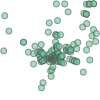

In [114]:
bicycles_union

In [124]:
lines_union = lines.geometry.unary_union

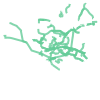

In [125]:
lines_union

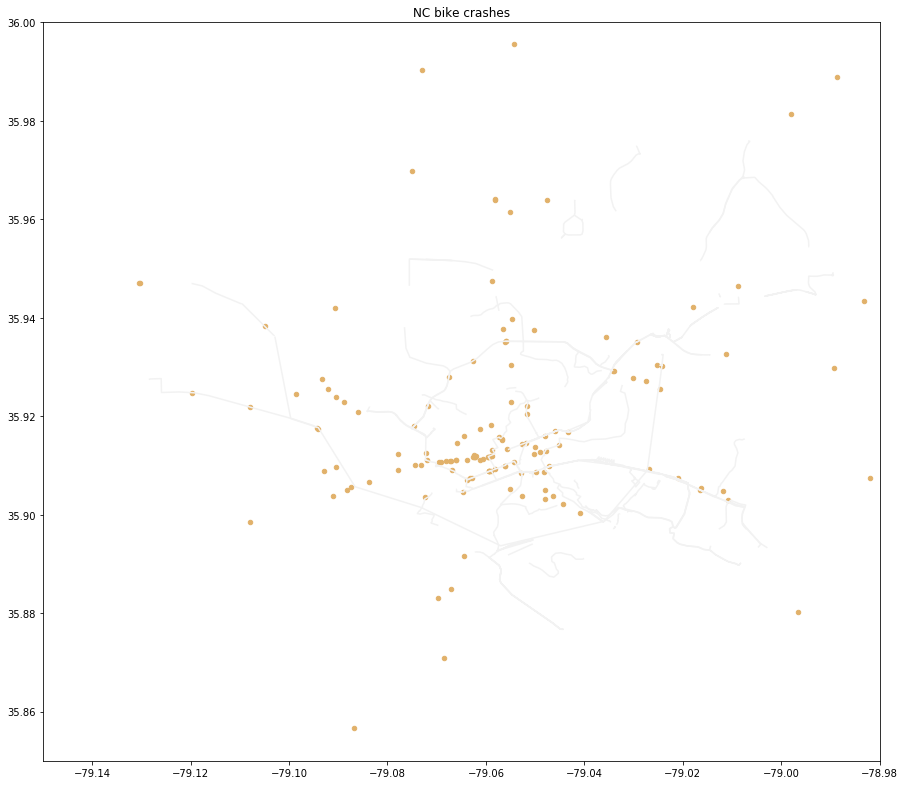

In [127]:
bike = bicycles[bicycles.geometry.intersects(lines_union)]

fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

bike.plot(ax=ax, color='#000000', zorder=0);
bicycles.plot(ax=ax, color='#E1B16A', zorder=1, markersize=20);
lines.plot(ax=ax, color='#f2f2f2', zorder=3);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));


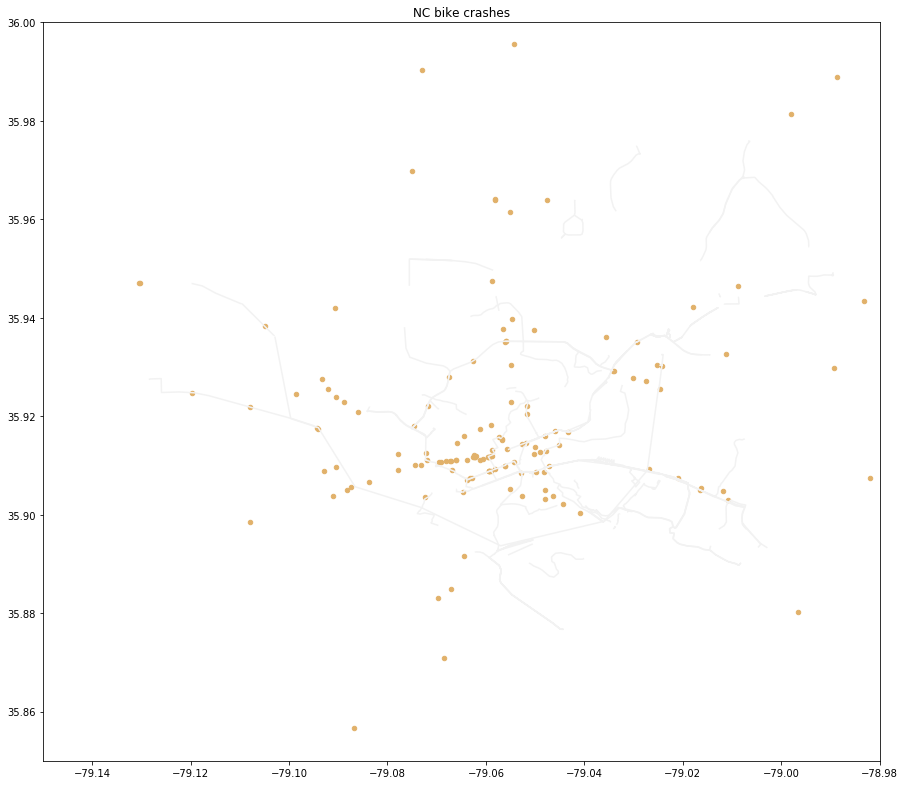

In [123]:
lines_com = lines[lines.geometry.intersects(bicycles_union)]

fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines_com.plot(ax=ax, color='red', zorder=0);
bicycles.plot(ax=ax, color='#E1B16A', zorder=1, markersize=20);
lines.plot(ax=ax, color='#f2f2f2', zorder=3);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

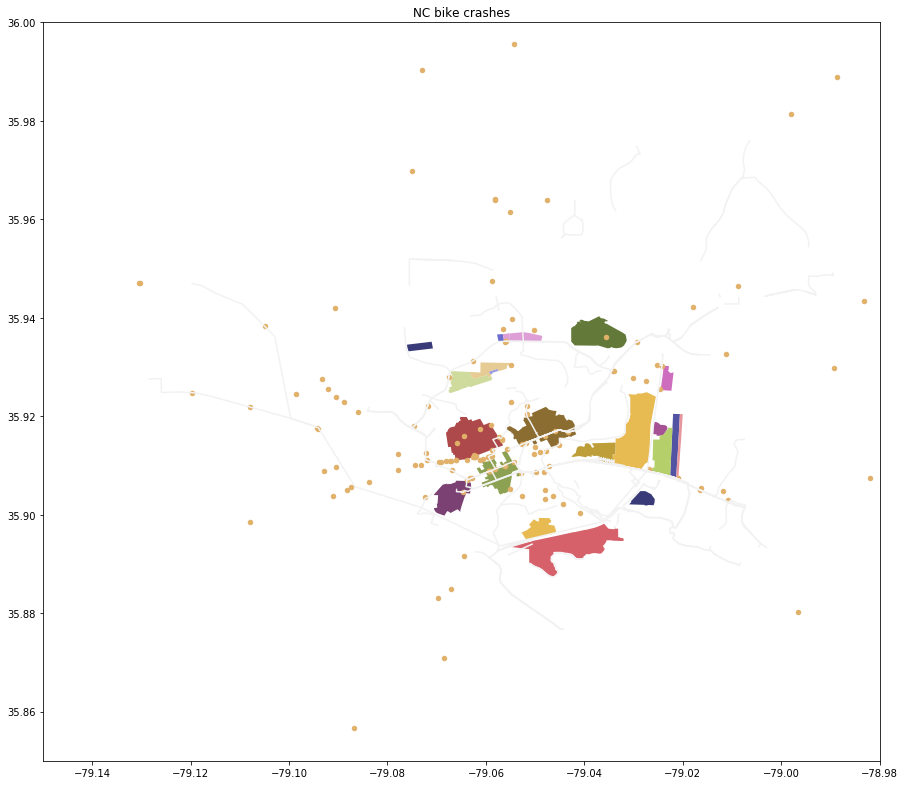

In [129]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

town.plot(ax=ax, cmap='tab20b')
bicycles.plot(ax=ax, color='#E1B16A', zorder=1, markersize=20);
lines.plot(ax=ax, color='#f2f2f2', zorder=2);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

In [130]:
town

,shape_area,district,effective,ordinance,symbol,geo_point_2d,shape_len,adoption_d,objectid,name,geometry
0,7.498664e+05,Airport Hazard District,1981-05-11,81-O-34,AH-A,"{'lat': 35.9341396603, 'lon': -79.0734023931}",3974.975089,1981-05-11,6,H Williams Airport West,"POLYGON ((-79.0755427955 35.9331899316, -79.07..."
1,1.116385e+06,Neighborhood Conservation,2011-05-23,2011-05-23/O-2,CD-7,"{'lat': 35.9031367262, 'lon': -79.0280067679}",4387.227570,2011-05-23,12,Highland Woods,"POLYGON ((-79.0309034192 35.9020798256, -79.03..."
2,1.816156e+06,Neighborhood Conservation,2011-10-26,2011-10-26/O-6,CD-8A,"{'lat': 35.9142146718, 'lon': -79.0216178734}",10058.752529,2011-10-26,16,Glen Lennox Area,"POLYGON ((-79.0213542651 35.907549405, -79.021..."
3,1.678619e+05,Airport Hazard District,2015-11-23,11-23/O-5,AH-A,"{'lat': 35.9359630335, 'lon': -79.0570261968}",1674.740280,2015-11-23,1622,H Williams Airport East,"POLYGON ((-79.056316032 35.9352836117, -79.056..."
4,1.044819e+05,Neighborhood Conservation,2017-01-23,2017-01-23/O-1,CD-10A,"{'lat': 35.9290758873, 'lon': -79.0584816777}",1637.071063,2017-01-23,2021,Elkin Hills,"POLYGON ((-79.0578378826 35.9290634638, -79.05..."
5,5.495641e+06,Neighborhood Conservation,2008-01-01,2007-10-8/O-8,CD-6,"{'lat': 35.9365963211, 'lon': -79.0373865126}",10516.017784,2007-10-08,1,Coker Hills,"POLYGON ((-79.0356951112 35.9392647696, -79.03..."
6,3.922405e+06,Historic District,1990-06-11,90-6-11/O-4B,HD-2,"{'lat': 35.9082581367, 'lon': -79.0572460856}",15537.612184,1990-06-11,4,Cameron-McCauley,"POLYGON ((-79.0547895043 35.911115491, -79.054..."
7,3.174863e+06,Neighborhood Conservation,2012-05-30,2012-05-30/O-4,CD-8C,"{'lat': 35.9124728447, 'lon': -79.0240474478}",9049.765673,2012-05-30,19,Glen Lennox Area,"POLYGON ((-79.0225810009 35.9079531656, -79.02..."
8,2.200212e+06,Neighborhood Conservation,2017-01-23,2017-01-23/O-1,CD-10A,"{'lat': 35.927174213, 'lon': -79.0641364137}",8350.633488,2017-01-23,2022,Elkin Hills,"POLYGON ((-79.065694044 35.9290843441, -79.065..."
9,6.914355e+06,Historic District,1976-12-13,O-76-51,HD-1,"{'lat': 35.917520653, 'lon': -79.0481354757}",15027.386931,1976-12-13,2,Franklin-Rosemary,"POLYGON ((-79.04784111070001 35.9218858803, -7..."


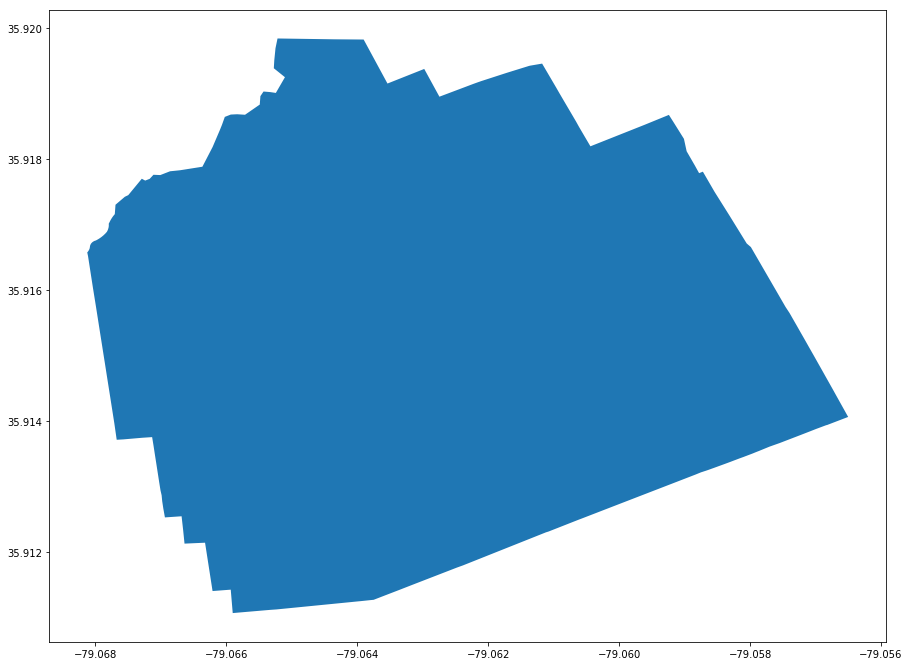

In [153]:
northside = town.loc[town['name'] == 'Northside']
northside.plot();

In [154]:
northside.geom_type.unique()

array(['Polygon'], dtype=object)

In [155]:
northside_u = town.geometry.unary_union
woods = bicycles[bicycles.geometry.intersects(northside_u)]

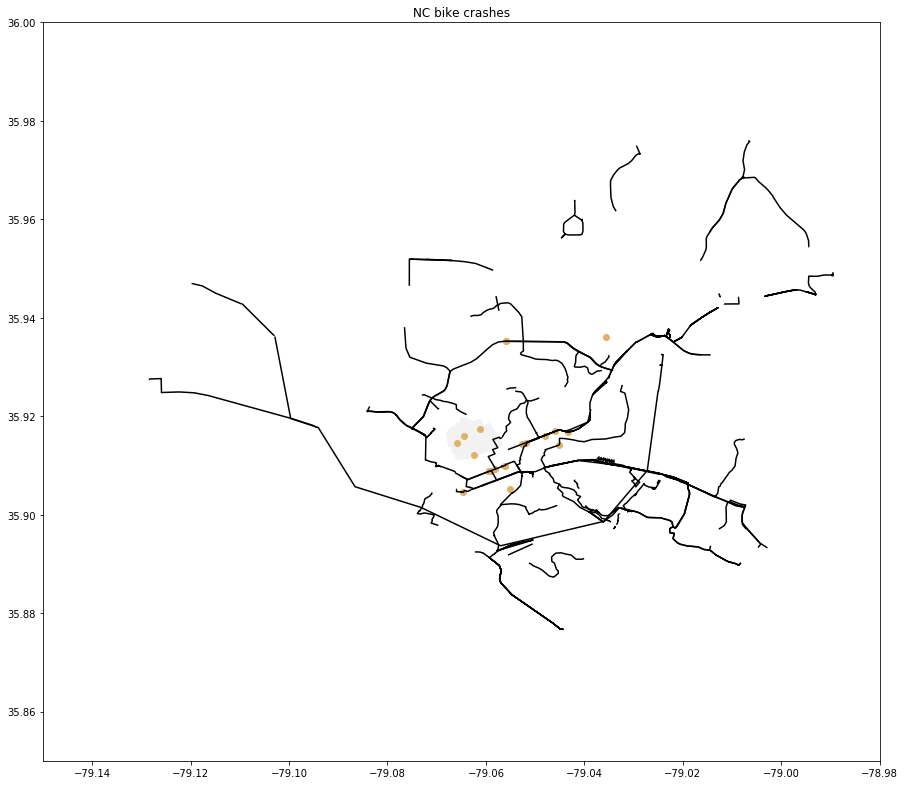

In [160]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

northside.plot(ax=ax, color='#f2f2f2', zorder=0);
woods.plot(ax=ax, color='#E1B16A', zorder=1);

# bicycles.plot(ax=ax, color='#E1B16A', zorder=1, markersize=20);
lines.plot(ax=ax, color='#000000', zorder=2);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

In [161]:
# Why do I see bicycle points outside the polygon selected?

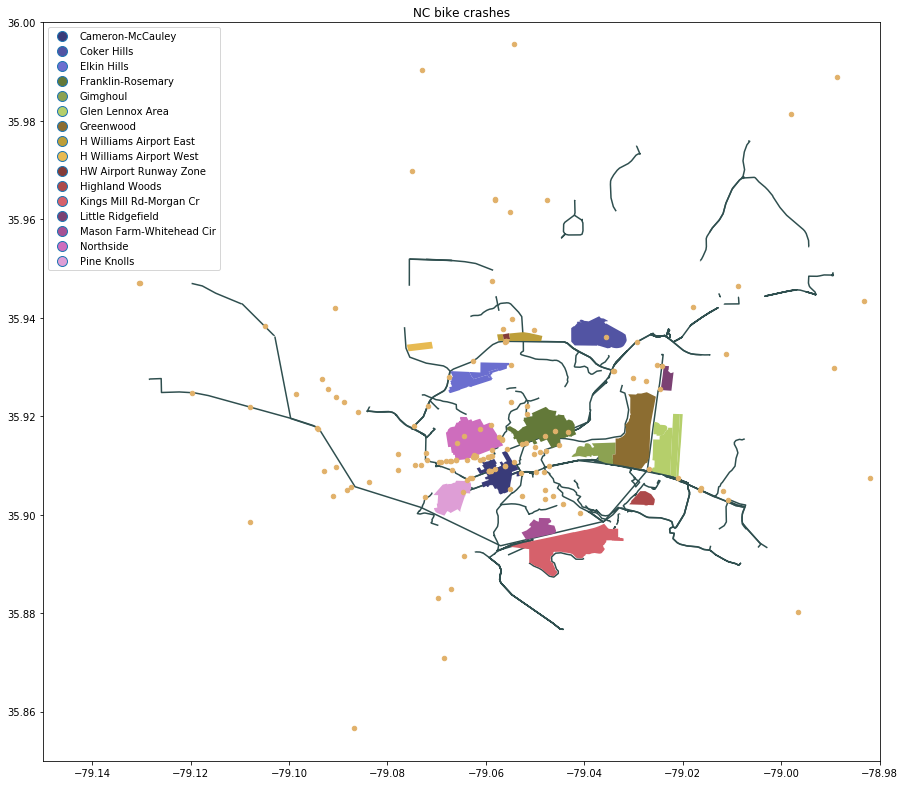

In [179]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines.plot(ax=ax, color='#2F4F4F', zorder=0);
town.plot(ax=ax, cmap='tab20b', zorder=1, column= 'name', categorical=True, legend=True,);
bicycles.plot(ax=ax, color='#E1B16A', zorder=2, markersize=20);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

In [175]:
lines.geom_type

0     LineString
1     LineString
2     LineString
3     LineString
4     LineString
5     LineString
6     LineString
7     LineString
8     LineString
9     LineString
10    LineString
11    LineString
12    LineString
13    LineString
14    LineString
15    LineString
16    LineString
17    LineString
18    LineString
19    LineString
20    LineString
21    LineString
22    LineString
23    LineString
24    LineString
25    LineString
26    LineString
27    LineString
28    LineString
29    LineString
         ...    
36    LineString
37    LineString
38    LineString
39    LineString
40    LineString
41    LineString
42    LineString
43    LineString
44    LineString
45    LineString
46    LineString
47    LineString
48    LineString
49    LineString
50    LineString
51    LineString
52    LineString
53    LineString
54    LineString
55    LineString
56    LineString
57    LineString
58    LineString
59    LineString
60    LineString
61    LineString
62    LineString
63    LineStri

In [177]:
town

,shape_area,district,effective,ordinance,symbol,geo_point_2d,shape_len,adoption_d,objectid,name,geometry
0,7.498664e+05,Airport Hazard District,1981-05-11,81-O-34,AH-A,"{'lat': 35.9341396603, 'lon': -79.0734023931}",3974.975089,1981-05-11,6,H Williams Airport West,"POLYGON ((-79.0755427955 35.9331899316, -79.07..."
1,1.116385e+06,Neighborhood Conservation,2011-05-23,2011-05-23/O-2,CD-7,"{'lat': 35.9031367262, 'lon': -79.0280067679}",4387.227570,2011-05-23,12,Highland Woods,"POLYGON ((-79.0309034192 35.9020798256, -79.03..."
2,1.816156e+06,Neighborhood Conservation,2011-10-26,2011-10-26/O-6,CD-8A,"{'lat': 35.9142146718, 'lon': -79.0216178734}",10058.752529,2011-10-26,16,Glen Lennox Area,"POLYGON ((-79.0213542651 35.907549405, -79.021..."
3,1.678619e+05,Airport Hazard District,2015-11-23,11-23/O-5,AH-A,"{'lat': 35.9359630335, 'lon': -79.0570261968}",1674.740280,2015-11-23,1622,H Williams Airport East,"POLYGON ((-79.056316032 35.9352836117, -79.056..."
4,1.044819e+05,Neighborhood Conservation,2017-01-23,2017-01-23/O-1,CD-10A,"{'lat': 35.9290758873, 'lon': -79.0584816777}",1637.071063,2017-01-23,2021,Elkin Hills,"POLYGON ((-79.0578378826 35.9290634638, -79.05..."
5,5.495641e+06,Neighborhood Conservation,2008-01-01,2007-10-8/O-8,CD-6,"{'lat': 35.9365963211, 'lon': -79.0373865126}",10516.017784,2007-10-08,1,Coker Hills,"POLYGON ((-79.0356951112 35.9392647696, -79.03..."
6,3.922405e+06,Historic District,1990-06-11,90-6-11/O-4B,HD-2,"{'lat': 35.9082581367, 'lon': -79.0572460856}",15537.612184,1990-06-11,4,Cameron-McCauley,"POLYGON ((-79.0547895043 35.911115491, -79.054..."
7,3.174863e+06,Neighborhood Conservation,2012-05-30,2012-05-30/O-4,CD-8C,"{'lat': 35.9124728447, 'lon': -79.0240474478}",9049.765673,2012-05-30,19,Glen Lennox Area,"POLYGON ((-79.0225810009 35.9079531656, -79.02..."
8,2.200212e+06,Neighborhood Conservation,2017-01-23,2017-01-23/O-1,CD-10A,"{'lat': 35.927174213, 'lon': -79.0641364137}",8350.633488,2017-01-23,2022,Elkin Hills,"POLYGON ((-79.065694044 35.9290843441, -79.065..."
9,6.914355e+06,Historic District,1976-12-13,O-76-51,HD-1,"{'lat': 35.917520653, 'lon': -79.0481354757}",15027.386931,1976-12-13,2,Franklin-Rosemary,"POLYGON ((-79.04784111070001 35.9218858803, -7..."


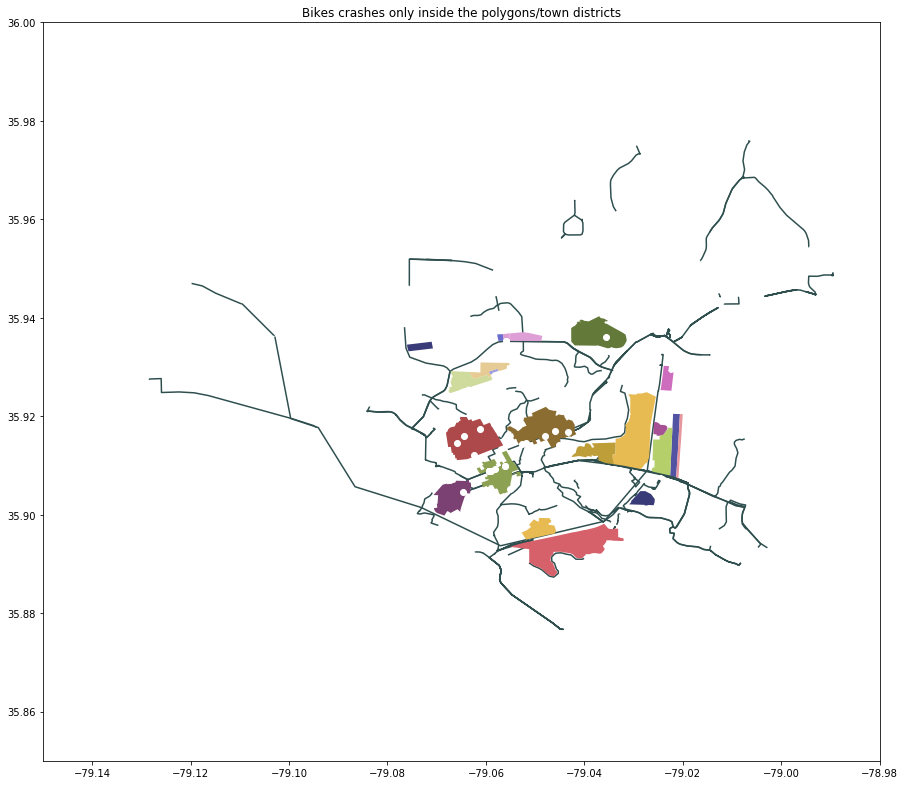

In [196]:
town_polygon = town.geometry.unary_union 
town_bikes = bicycles[bicycles.geometry.intersects(town_polygon)]

fig, ax = plt.subplots()

title='Bikes crashes only inside the polygons/town districts'
ax.set(title=title)

lines.plot(ax=ax, color='#2F4F4F', zorder=0);
town_bikes.plot(ax=ax, color='#ffffff', zorder=2);
# bicycles.plot(ax=ax, color='#E1B16A', zorder=2, markersize=20);
town.plot(ax=ax, zorder=1, cmap='tab20b');

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));